In [1]:
#step 1: install/upgrade the latest genai SDK
%pip install google-genai --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 5.0 MB/s eta 0:00:00


In [12]:
#import the genai library
from google import genai
from google.genai import types #used for specifying image generation configuration settings etc

In [3]:
#step2: AIStudio: read the api key from the user data
from google.colab import userdata
client = genai.Client(api_key=userdata.get("GEMINI_API_KEY"))

#If you want to read from environment keys
#import os
#client = genai.Client(api_key=os.environ["GEMINI_API_KEY"])

In [ ]:
#step2: Vertex AI: read the api key from the user data

#for vertex, you need to have a service account or login/auth
#login as the current user for colab testing purposes
from google.colab import auth
auth.authenticate_user()

#then configure the client with the project and location settings

#Uncomment the following if you are running on Vertex setup

#using the colab userdata
#from google.colab import userdata
#client = genai.Client(vertexai=True, #ensure to turn on VertexAI
#                      project=userdata.get("GOOGLE_CLOUD_PROJECT"),
#                      location=userdata.get("GOOGLE_CLOUD_REGION")) # e.g., 'us-central1'

#or use the folliwing if you want to read from environment keys
#import os
#client = genai.Client(vertexai=True,
#                      project=os.environ["GOOGLE_CLOUD_PROJECT"],
#                      location=os.environ["GOOGLE_CLOUD_REGION"]) # e.g., 'us-central1'

In [7]:
#step 3: Get model details
model_name = "models/imagen-3.0-generate-002"
try:
    model_details = client.models.get(model=model_name) #
    print(f"Details for model '{model_name}':")
    print(f"Model Name: {model_details.name}")
    print(f"Input Token Limit: {model_details.input_token_limit}")
    print(f"Output Token Limit: {model_details.output_token_limit}")
except Exception as e:
    print(f"Error retrieving model details for '{model_name}': {e}")

Details for model 'models/imagen-3.0-generate-002':
Model Name: models/imagen-3.0-generate-002
Input Token Limit: 480
Output Token Limit: 8192


In [18]:
#step 4: Generate an image

# Define the prompt for Imagen
prompt = """
A photorealistic image of a golden retriever wearing sunglasses, relaxing on a beach chair,
with the text 'Summer Vibes' written clearly on a sign next to it.
"""

# Generate the image
response = client.models.generate_images(
    model='imagen-3.0-generate-002',
    prompt=prompt,
    config=types.GenerateImagesConfig(
        number_of_images=1, #an optional parameter specifying the number of images
    )
)

In [35]:
#step 5: Process the response to save the image
from PIL import Image
from io import BytesIO

#loop through and save images in a new file
for generated_image in response.generated_images:
  image = Image.open(BytesIO(generated_image.image.image_bytes))
  image.save("generated_image.png")
  break #save only the first one for now

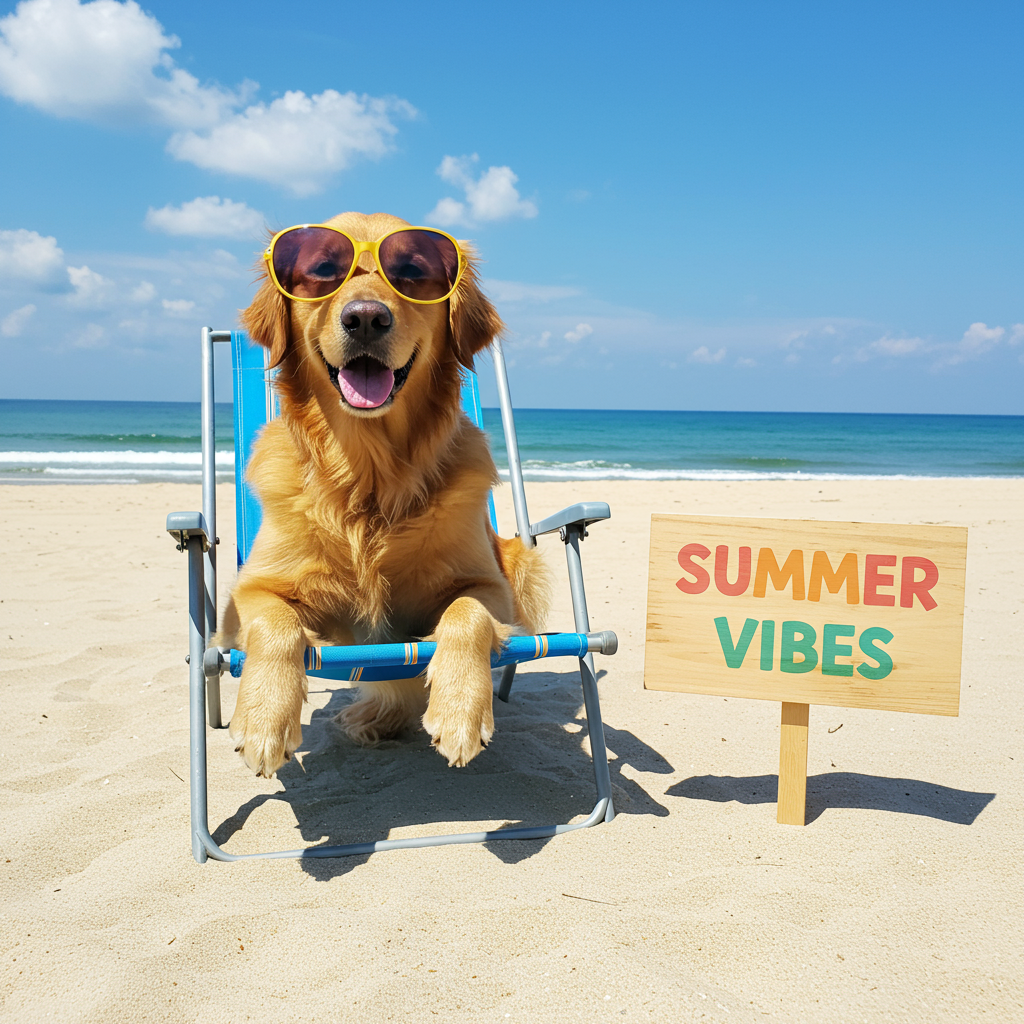

In [36]:
#step 6: Show the image
from IPython.display import Image
Image(filename='generated_image.png')